In [1]:
import sys, os
sys.path.append(os.path.dirname(os.path.join((os.path.pardir), "Modules")))

origin_dir = os.path.join(os.path.pardir, 'Data')


new_dir_path = os.path.join(os.path.pardir, 'Datasets')

true_parasitized_path = os.path.relpath("corrected_images/True_parasitized.csv")
false_parasitized_path = os.path.relpath("corrected_images/False_parasitized.csv")
true_uninfected_path = os.path.relpath("corrected_images/True_uninfected.csv")
false_uninfected_path = os.path.relpath("corrected_images/False_uninfected.csv")

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import numpy as np

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, MiniBatchKMeans
#from faiss import Kmeans as KMeans
#rom tsnecuda import TSNE
from sklearn.preprocessing import StandardScaler as scaler

### **RUN THE BELOW CELL IF USING COLAB** (overrides paths and installs packages)

For the git clone segment, please add the Personal Access Token instead of the {pat} segment 

In [3]:
# # RUN THIS CELL IF COLAB

# !pip install faiss-gpu
# !pip install dask[bag]
# !pip3 install tsnecuda==3.0.1+cu113 -f https://tsnecuda.isx.ai/tsnecuda_stable.html

# from tsnecuda import TSNE
# import dask


# # RUN THIS CELL IF COLAB

# !pip install faiss-gpu
# !pip3 install tsnecuda==3.0.1+cu113 -f https://tsnecuda.isx.ai/tsnecuda_stable.html

# from tsnecuda import TSNE

# 

# from google.colab import drive

# drive.mount('/content/gdrive')
# !git clone "https://{pat}@github.com/madhava20217/Malaria-Detection-from-Cells.git"

# !pip install -q -r "/content/Malaria-Detection-from-Cells/requirements_versionless.txt" 

# sys.path.append(os.path.dirname('/content/Malaria-Detection-from-Cells/Modules'))
# origin_dir = "/content/Data"
# new_dir_path = "/content/Datasets/"

# true_parasitized_path  = '/content/Malaria-Detection-from-Cells/EDA/corrected_images/True_parasitized.csv'
# false_parasitized_path = '/content/Malaria-Detection-from-Cells/EDA/corrected_images/False_parasitized.csv'
# true_uninfected_path   = '/content/Malaria-Detection-from-Cells/EDA/corrected_images/True_uninfected.csv'
# false_uninfected_path  = '/content/Malaria-Detection-from-Cells/EDA/corrected_images/False_uninfected.csv'


### Run this cell if you want to download data and label the datapoints

In [4]:
# from Modules.data_download import Data_Download
# from Modules.labelling import Labelling

# download = Data_Download(origin_dir)

In [5]:
parasitized_dir = os.path.join(origin_dir, 'cell-images-for-detecting-malaria', 'cell_images', "Parasitized")
uninfected_dir  = os.path.join(origin_dir, 'cell-images-for-detecting-malaria', 'cell_images', 'Uninfected')

true_parasitized = pd.read_csv(true_parasitized_path, index_col = 0, names = ['ImagePath'], header = 0)
false_parasitized = pd.read_csv(false_parasitized_path, index_col = 0, names = ['ImagePath'], header = 0)

true_uninfected = pd.read_csv(true_uninfected_path, index_col = 0, names = ['ImagePath'], header = 0)
false_uninfected = pd.read_csv(false_uninfected_path, index_col = 0, names = ['ImagePath'], header = 0)

## Data Import

## Modifying File Paths in DataFrames to point to images

In [6]:
for dataset in [true_parasitized, false_parasitized]:
    dataset['ImagePath'] = dataset['ImagePath'].apply(lambda row: os.path.join(parasitized_dir, row))

for dataset in [true_uninfected, false_uninfected]:
    dataset['ImagePath'] = dataset['ImagePath'].apply(lambda row: os.path.join(uninfected_dir, row))

## Visualising Images

### Labelling

In [7]:
true_parasitized['status'] = 'true_parasitized'
false_parasitized['status'] = 'false_parasitized'

true_uninfected['status'] = 'true_uninfected'
false_uninfected['status'] = 'false_uninfected'

#joining the dataframes
images = pd.concat([true_parasitized, false_parasitized, true_uninfected, false_uninfected])
images.reset_index(drop = True, inplace = True)

### Function to read a single image given the path

In [8]:
# def read_image(path, resize = False, width = 50, height = 50, IMAGE_MODE = 1):
#     '''Reads and loads images into a numpy array
#     Returns: a numpy array
    
#     Arguments:
    
#     1. path_arr: array containing paths to the images
#     2. resize: whether to resize the image
#     3. width : width of the resized image
#     4. height: height of the resized image
#     5 . IMAGE_MODE: the state of the images - 1 for Colour, 0 for GrayScale, as per opencv2 documentation'''

#     image = cv2.imread(path, IMAGE_MODE)
#     image = image[...,::-1]
#     if resize:
#         image = cv2.resize(image, (width, height))
    
#     return image

### Visualising Color:

What to do here?

- Plot images of the various classes (true_uninfected, true_parasitized, false_uninfected, false_parasitized) 
- Randomly choose 8 images with no replacement from each class. Use the following dataframes:
  - true_parasitized
  - false_parasitized
  - true_uninfected
  - false_uninfected

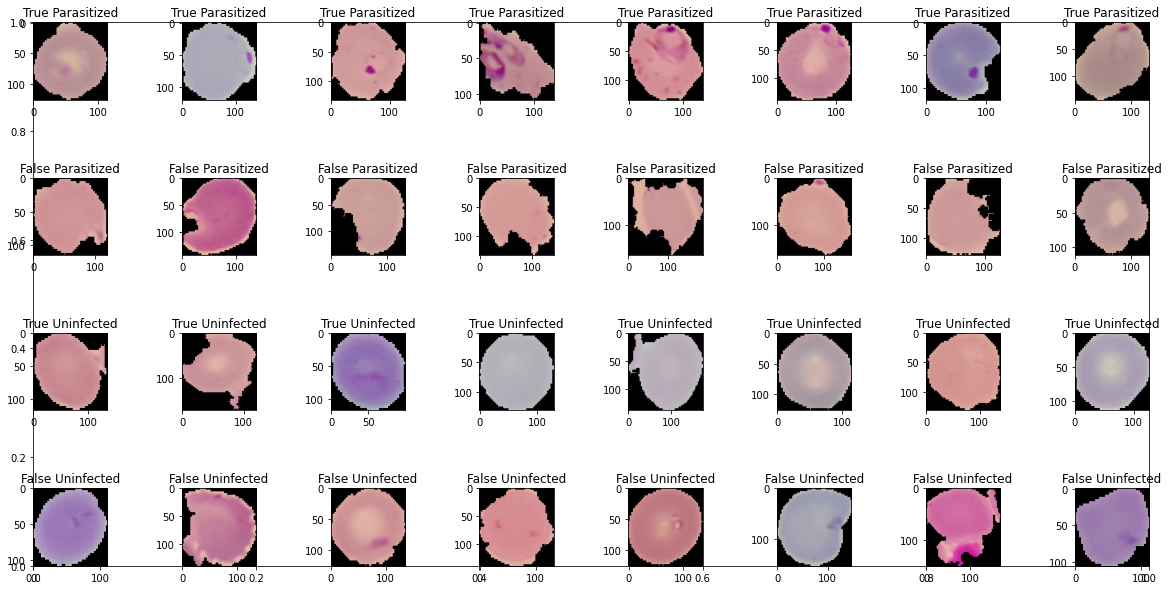

In [9]:
fig,ax = plt.subplots(figsize = (20,10))
counter = 1
for img in true_parasitized['ImagePath']:
  if(counter==9):
    break
  img = cv2.imread(img, 1)[..., ::-1]
  fig.add_subplot(4,8,counter)
  plt.title("True Parasitized")
  plt.imshow(img,aspect='auto')
  counter+=1

for img in false_parasitized['ImagePath']:
  if(counter==17):
    break
  img = cv2.imread(img, 1)[..., ::-1]
  fig.add_subplot(4,8,counter)
  plt.title("False Parasitized")
  plt.imshow(img,aspect='auto')
  counter+=1
  
for img in true_uninfected['ImagePath']:
  if(counter==25):
    break
  img = cv2.imread(img, 1)[..., ::-1]
  fig.add_subplot(4,8,counter)
  plt.title("True Uninfected")
  plt.imshow(img,aspect='auto')
  counter+=1

for img in false_uninfected['ImagePath']:
  if(counter==33):
    break
  img = cv2.imread(img, 1)[..., ::-1]
  fig.add_subplot(4,8,counter)
  plt.title("False Uninfected")
  plt.imshow(img,aspect='auto')
  counter+=1

plt. subplots_adjust(hspace=1, wspace=1)

### Red Dimension: TODO

The same as above, but visualise the R dimension of each image

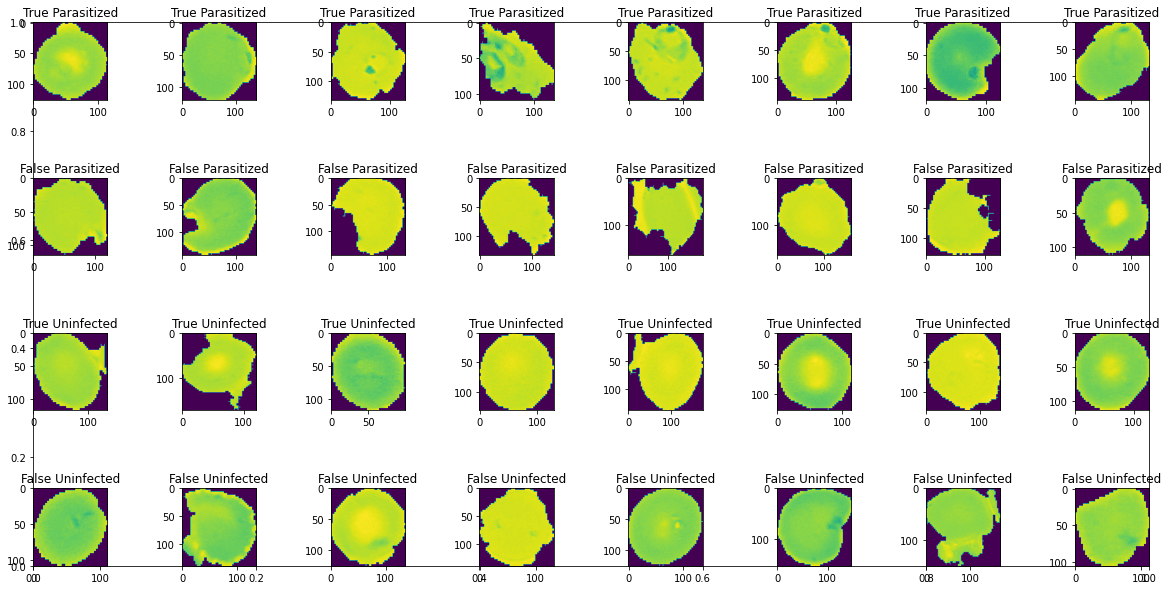

In [10]:
fig,ax = plt.subplots(figsize = (20,10))
counter = 1
for img in true_parasitized['ImagePath']:
  if(counter==9):
    break
  img = cv2.imread(img, 1)  [:, :, 2]
  fig.add_subplot(4,8,counter)
  plt.title("True Parasitized")
  plt.imshow(img,aspect='auto')
  counter+=1

for img in false_parasitized['ImagePath']:
  if(counter==17):
    break
  img = cv2.imread(img, 1)  [:, :, 2]
  fig.add_subplot(4,8,counter)
  plt.title("False Parasitized")
  plt.imshow(img,aspect='auto')
  counter+=1
  
for img in true_uninfected['ImagePath']:
  if(counter==25):
    break
  img = cv2.imread(img, 1)  [:, :, 2]
  fig.add_subplot(4,8,counter)
  plt.title("True Uninfected")
  plt.imshow(img,aspect='auto')
  counter+=1

for img in false_uninfected['ImagePath']:
  if(counter==33):
    break
  img = cv2.imread(img, 1)  [:, :, 2]
  fig.add_subplot(4,8,counter)
  plt.title("False Uninfected")
  plt.imshow(img,aspect='auto')
  counter+=1

plt. subplots_adjust(hspace=1, wspace=1)

### Blue Dimension: TODO

The same as above, but visualise the B dimension of each image

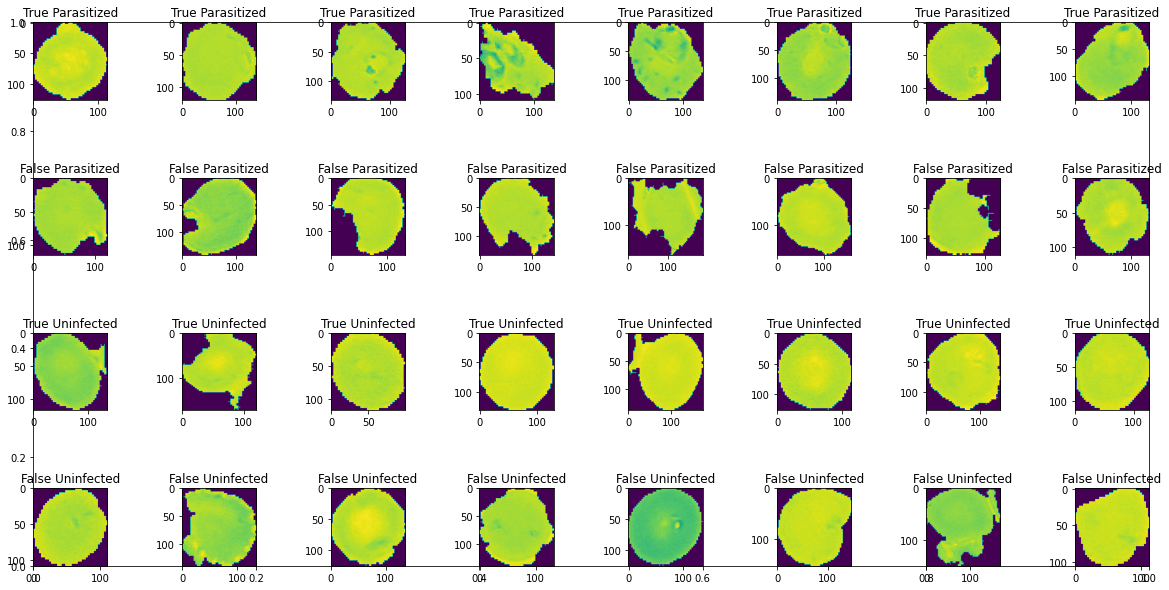

In [11]:
fig,ax = plt.subplots(figsize = (20,10))
counter = 1
for img in true_parasitized['ImagePath']:
  if(counter==9):
    break
  img = cv2.imread(img, 1)  [:, :, 0]
  fig.add_subplot(4,8,counter)
  plt.title("True Parasitized")
  plt.imshow(img,aspect='auto')
  counter+=1

for img in false_parasitized['ImagePath']:
  if(counter==17):
    break
  img = cv2.imread(img, 1)  [:, :, 0]
  fig.add_subplot(4,8,counter)
  plt.title("False Parasitized")
  plt.imshow(img,aspect='auto')
  counter+=1
  
for img in true_uninfected['ImagePath']:
  if(counter==25):
    break
  img = cv2.imread(img, 1)  [:, :, 0]
  fig.add_subplot(4,8,counter)
  plt.title("True Uninfected")
  plt.imshow(img,aspect='auto')
  counter+=1

for img in false_uninfected['ImagePath']:
  if(counter==33):
    break
  img = cv2.imread(img, 1)  [:, :, 0]
  fig.add_subplot(4,8,counter)
  plt.title("False Uninfected")
  plt.imshow(img,aspect='auto')
  counter+=1

plt. subplots_adjust(hspace=1, wspace=1)

### Green Dimension: TODO

The same as above, but visualise the G dimension of each image

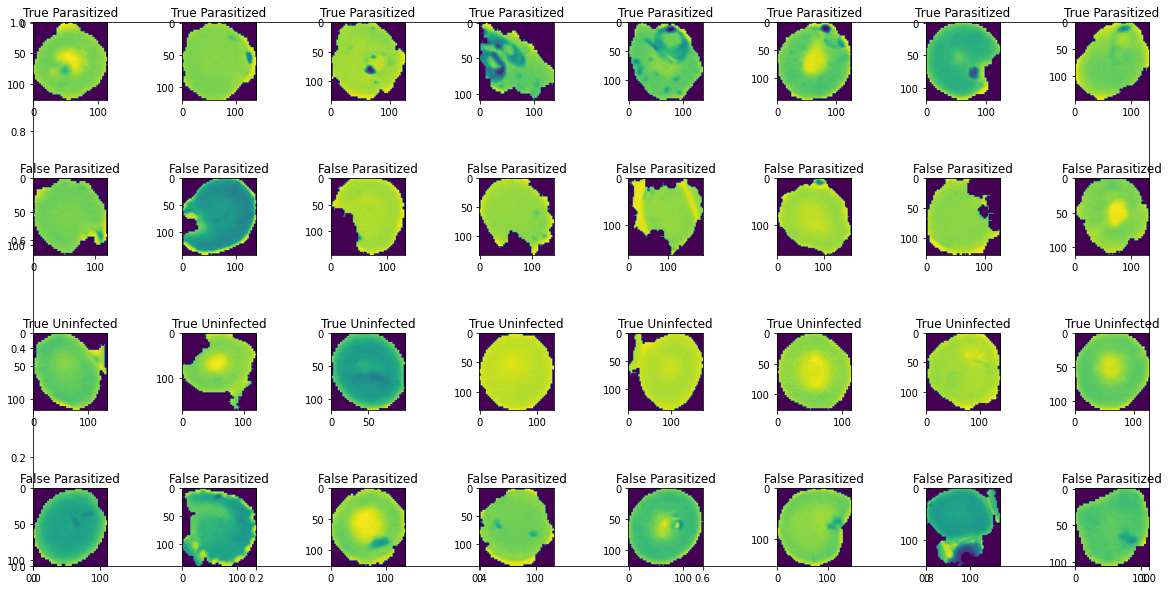

In [12]:
fig,ax = plt.subplots(figsize = (20,10))
counter = 1
for img in true_parasitized['ImagePath']:
  if(counter==9):
    break
  img = cv2.imread(img, 1)  [:, :, 1]
  fig.add_subplot(4,8,counter)
  plt.title("True Parasitized")
  plt.imshow(img,aspect='auto')
  counter+=1

for img in false_parasitized['ImagePath']:
  if(counter==17):
    break
  img = cv2.imread(img, 1)  [:, :, 1]
  fig.add_subplot(4,8,counter)
  plt.title("False Parasitized")
  plt.imshow(img,aspect='auto')
  counter+=1
  
for img in true_uninfected['ImagePath']:
  if(counter==25):
    break
  img = cv2.imread(img, 1)  [:, :, 1]
  fig.add_subplot(4,8,counter)
  plt.title("True Uninfected")
  plt.imshow(img,aspect='auto')
  counter+=1

for img in false_uninfected['ImagePath']:
  if(counter==33):
    break
  img = cv2.imread(img, 1)  [:, :, 1]
  fig.add_subplot(4,8,counter)
  plt.title("False Parasitized")
  plt.imshow(img,aspect='auto')
  counter+=1

plt. subplots_adjust(hspace=1, wspace=1)

### Grayscale: TODO

The same as above, but visualise each image as grayscale

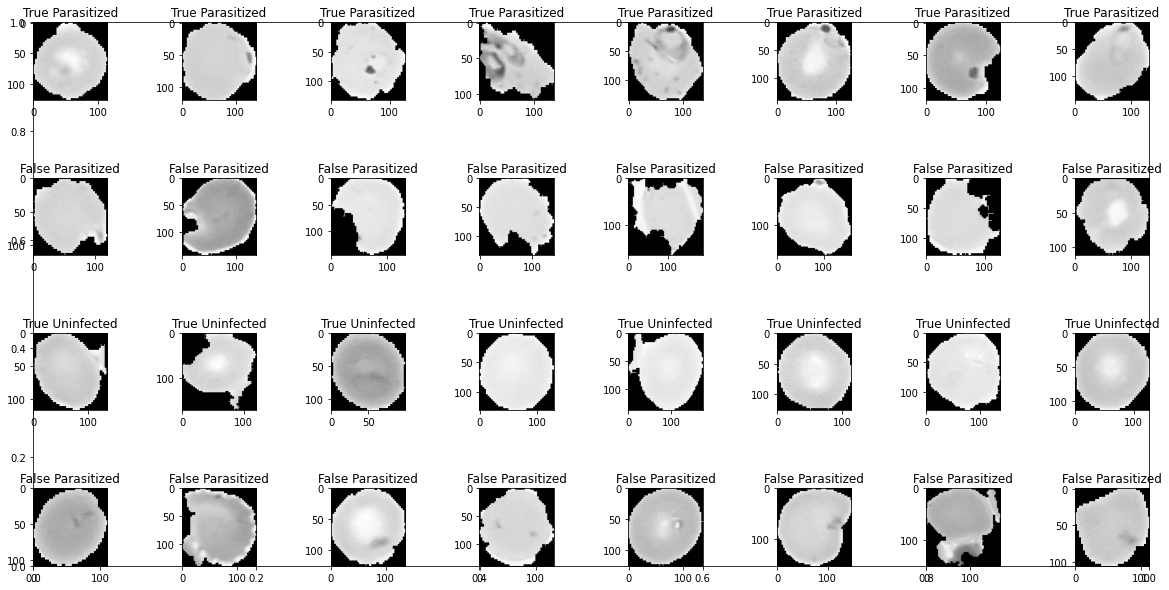

In [13]:
fig,ax = plt.subplots(figsize = (20,10))
counter = 1
for img in true_parasitized['ImagePath']:
  if(counter==9):
    break
  img = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
  fig.add_subplot(4,8,counter)
  plt.title("True Parasitized")
  plt.imshow(img,aspect='auto',cmap="gray")
  counter+=1

for img in false_parasitized['ImagePath']:
  if(counter==17):
    break
  img = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
  fig.add_subplot(4,8,counter)
  plt.title("False Parasitized")
  plt.imshow(img,aspect='auto',cmap="gray")
  counter+=1
  
for img in true_uninfected['ImagePath']:
  if(counter==25):
    break
  img = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
  fig.add_subplot(4,8,counter)
  plt.title("True Uninfected")
  plt.imshow(img,aspect='auto',cmap="gray")
  counter+=1

for img in false_uninfected['ImagePath']:
  if(counter==33):
    break
  img = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
  fig.add_subplot(4,8,counter)
  plt.title("False Parasitized")
  plt.imshow(img,aspect='auto',cmap="gray")
  counter+=1

plt. subplots_adjust(hspace=1, wspace=1)

### Inverted: TODO

The same as above, but visualise each image as grayscale

In [ ]:
fig,ax = plt.subplots(figsize = (20,10))
counter = 1
for img in true_parasitized['ImagePath']:
  if(counter==9):
    break
  img = cv2.imread(img, 1)[..., ::-1]
  img = cv2.bitwise_not(img)
  fig.add_subplot(4,8,counter)
  plt.title("True Parasitized")
  plt.imshow(img,aspect='auto')
  counter+=1

for img in false_parasitized['ImagePath']:
  if(counter==17):
    break
  img = cv2.imread(img, 1)[..., ::-1]
  img = cv2.bitwise_not(img)
  fig.add_subplot(4,8,counter)
  plt.title("False Parasitized")
  plt.imshow(img,aspect='auto')
  counter+=1
  
for img in true_uninfected['ImagePath']:
  if(counter==25):
    break
  img = cv2.imread(img, 1)[..., ::-1]
  img = cv2.bitwise_not(img)
  fig.add_subplot(4,8,counter)
  plt.title("True Uninfected")
  plt.imshow(img,aspect='auto')
  counter+=1

for img in false_uninfected['ImagePath']:
  if(counter==33):
    break
  img = cv2.imread(img, 1)[..., ::-1]
  img = cv2.bitwise_not(img)
  fig.add_subplot(4,8,counter)
  plt.title("False Uninfected")
  plt.imshow(img,aspect='auto')
  counter+=1

plt. subplots_adjust(hspace=1, wspace=1)

### Red Inverted Dimension: TODO

The same as above, but visualise the R dimension of each image

In [ ]:
fig,ax = plt.subplots(figsize = (20,10))
counter = 1
for img in true_parasitized['ImagePath']:
  if(counter==9):
    break
  img = cv2.imread(img, 1)  [:, :, 2]
  img = cv2.bitwise_not(img)
  fig.add_subplot(4,8,counter)
  plt.title("True Parasitized")
  plt.imshow(img,aspect='auto')
  counter+=1

for img in false_parasitized['ImagePath']:
  if(counter==17):
    break
  img = cv2.imread(img, 1)  [:, :, 2]
  img = cv2.bitwise_not(img)
  fig.add_subplot(4,8,counter)
  plt.title("False Parasitized")
  plt.imshow(img,aspect='auto')
  counter+=1
  
for img in true_uninfected['ImagePath']:
  if(counter==25):
    break
  img = cv2.imread(img, 1)  [:, :, 2]
  img = cv2.bitwise_not(img)
  fig.add_subplot(4,8,counter)
  plt.title("True Uninfected")
  plt.imshow(img,aspect='auto')
  counter+=1

for img in false_uninfected['ImagePath']:
  if(counter==33):
    break
  img = cv2.imread(img, 1)  [:, :, 2]
  img = cv2.bitwise_not(img)
  fig.add_subplot(4,8,counter)
  plt.title("False Uninfected")
  plt.imshow(img,aspect='auto')
  counter+=1

plt. subplots_adjust(hspace=1, wspace=1)

### Blue Inverted Dimension: TODO

The same as above, but visualise the B dimension of each image

In [ ]:
fig,ax = plt.subplots(figsize = (20,10))
counter = 1
for img in true_parasitized['ImagePath']:
  if(counter==9):
    break
  img = cv2.imread(img, 1)  [:, :, 0]
  img = cv2.bitwise_not(img)
  fig.add_subplot(4,8,counter)
  plt.title("True Parasitized")
  plt.imshow(img,aspect='auto')
  counter+=1

for img in false_parasitized['ImagePath']:
  if(counter==17):
    break
  img = cv2.imread(img, 1)  [:, :, 0]
  img = cv2.bitwise_not(img)
  fig.add_subplot(4,8,counter)
  plt.title("False Parasitized")
  plt.imshow(img,aspect='auto')
  counter+=1
  
for img in true_uninfected['ImagePath']:
  if(counter==25):
    break
  img = cv2.imread(img, 1)  [:, :, 0]
  img = cv2.bitwise_not(img)
  fig.add_subplot(4,8,counter)
  plt.title("True Uninfected")
  plt.imshow(img,aspect='auto')
  counter+=1

for img in false_uninfected['ImagePath']:
  if(counter==33):
    break
  img = cv2.imread(img, 1)  [:, :, 0]
  img = cv2.bitwise_not(img)
  fig.add_subplot(4,8,counter)
  plt.title("False Uninfected")
  plt.imshow(img,aspect='auto')
  counter+=1

plt. subplots_adjust(hspace=1, wspace=1)

### Green Inverted Dimension: TODO

The same as above, but visualise the G dimension of each image

In [ ]:
fig,ax = plt.subplots(figsize = (20,10))
counter = 1
for img in true_parasitized['ImagePath']:
  if(counter==9):
    break
  img = cv2.imread(img, 1)  [:, :, 1]
  img = cv2.bitwise_not(img)
  fig.add_subplot(4,8,counter)
  plt.title("True Parasitized")
  plt.imshow(img,aspect='auto')
  counter+=1

for img in false_parasitized['ImagePath']:
  if(counter==17):
    break
  img = cv2.imread(img, 1)  [:, :, 1]
  img = cv2.bitwise_not(img)
  fig.add_subplot(4,8,counter)
  plt.title("False Parasitized")
  plt.imshow(img,aspect='auto')
  counter+=1
  
for img in true_uninfected['ImagePath']:
  if(counter==25):
    break
  img = cv2.imread(img, 1)  [:, :, 1]
  img = cv2.bitwise_not(img)
  fig.add_subplot(4,8,counter)
  plt.title("True Uninfected")
  plt.imshow(img,aspect='auto')
  counter+=1

for img in false_uninfected['ImagePath']:
  if(counter==33):
    break
  img = cv2.imread(img, 1)  [:, :, 1]
  img = cv2.bitwise_not(img)
  fig.add_subplot(4,8,counter)
  plt.title("False Parasitized")
  plt.imshow(img,aspect='auto')
  counter+=1

plt. subplots_adjust(hspace=1, wspace=1)

### Grayscale Inverted : TODO

The same as above, but visualise each image as grayscale

In [ ]:
fig,ax = plt.subplots(figsize = (20,10))
counter = 1
for img in true_parasitized['ImagePath']:
  if(counter==9):
    break
  img = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
  img = cv2.bitwise_not(img)
  fig.add_subplot(4,8,counter)
  plt.title("True Parasitized")
  plt.imshow(img,aspect='auto',cmap="gray")
  counter+=1

for img in false_parasitized['ImagePath']:
  if(counter==17):
    break
  img = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
  img = cv2.bitwise_not(img)
  fig.add_subplot(4,8,counter)
  plt.title("False Parasitized")
  plt.imshow(img,aspect='auto',cmap="gray")
  counter+=1
  
for img in true_uninfected['ImagePath']:
  if(counter==25):
    break
  img = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
  img = cv2.bitwise_not(img)
  fig.add_subplot(4,8,counter)
  plt.title("True Uninfected")
  plt.imshow(img,aspect='auto',cmap="gray")
  counter+=1

for img in false_uninfected['ImagePath']:
  if(counter==33):
    break
  img = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
  img = cv2.bitwise_not(img)
  fig.add_subplot(4,8,counter)
  plt.title("False Parasitized")
  plt.imshow(img,aspect='auto',cmap="gray")
  counter+=1

plt. subplots_adjust(hspace=1, wspace=1)

## Clustering and Visualisation using TSNE

### Function for loading images as a numpy array

In [21]:
def load_images(path_arr, resize = True, width = 50, height = 50, IMAGE_MODE = 1):
    '''Reads and loads images into a numpy array
    Returns: a numpy array
    
    Arguments:
    
    1. path_arr: array containing paths to the images
    2. resize: whether to resize the image
    3. width : width of the resized image
    4. height: height of the resized image
    5 . IMAGE_MODE: the state of the images - 1 for Colour, 0 for GrayScale, as per opencv2 documentation'''
    
    arr = []
    for path in path_arr:
        resized = cv2.imread(path, IMAGE_MODE)
        resized = resized[..., ::-1]
        if resize:
            resized = cv2.resize(resized, (width, height))
        arr.append(resized)
    return np.array(arr)

### Data Loading

Here, we resize the images so that the distances can be measured without issues.

In [22]:
images.ImagePath[0]

'..\\Data\\cell-images-for-detecting-malaria\\cell_images\\Parasitized\\C39P4thinF_original_IMG_20150622_105253_cell_94.png'

In [23]:
#resizing using 
h = 50
w = 50

image_array = load_images(images.ImagePath.to_numpy(), resize = True, height = 50, width = 50)/255.0

print(image_array.shape)


(27558, 50, 50, 3)


In [24]:
dims = image_array.shape[1:]
shape = 1
for x in dims:
    shape*=x

image_array = image_array.reshape((image_array.shape[0], shape))
print(image_array.shape)

(27558, 7500)


In [25]:
image_array[0].shape

(7500,)

### Reducing dimensions and visualising using TSNE

The visualisations after reducing dimensions with TSNE suggest that the uninfected cells are in two major blobs and the parasitized images surround them. There isn't a clear relation between correctly and falsely labelled data with respect to the plots obtained.

In [28]:
#TODO with GPU

tsne = TSNE(
    n_components = 2,
    perplexity = 100,
    n_iter = 1000,
    metric = 'euclidean',
    verbose = 0,
)

coords = tsne.fit_transform(image_array)

fit_df = pd.DataFrame(coords)
fit_df.columns = ['x', 'y']
fit_df['label'] = images['status']

C:\Users\krish\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\krish\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


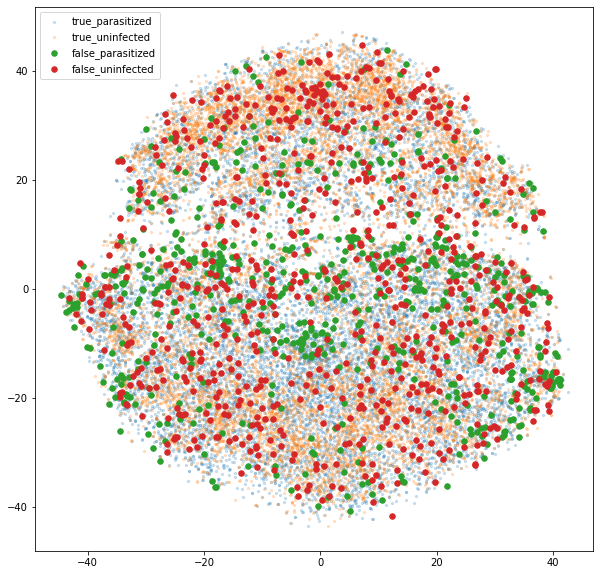

In [29]:
plt.figure(figsize = (10, 10))


for val in ['true_parasitized', 'true_uninfected']:
    plt.scatter(fit_df[fit_df.label == val].x, 
                fit_df[fit_df.label == val].y,
                s = 5,
                alpha = 0.2,
                label = val)

for val in ['false_parasitized', 'false_uninfected']:
    plt.scatter(fit_df[fit_df.label == val].x, 
                fit_df[fit_df.label == val].y,
                s = 30,
                alpha = 1,
                label = val)

plt.legend(loc = 'upper left')

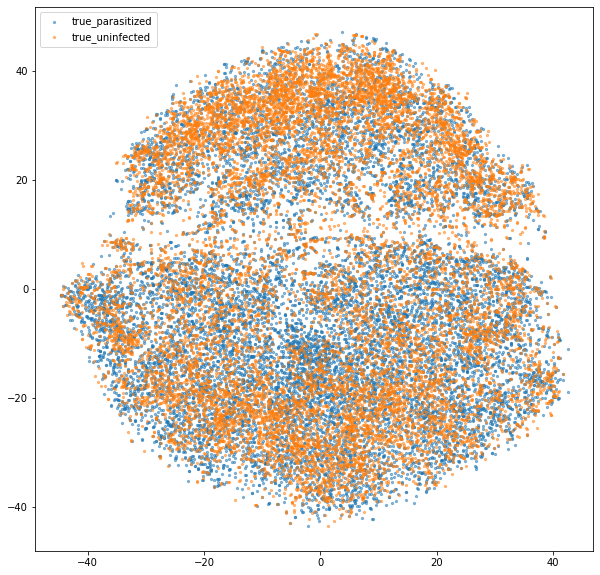

In [30]:
plt.figure(figsize = (10, 10))


for val in ['true_parasitized', 'true_uninfected']:
    plt.scatter(fit_df[fit_df.label == val].x, 
                fit_df[fit_df.label == val].y,
                s = 5,
                alpha = 0.5,
                label = val)
plt.legend(loc = 'upper left')

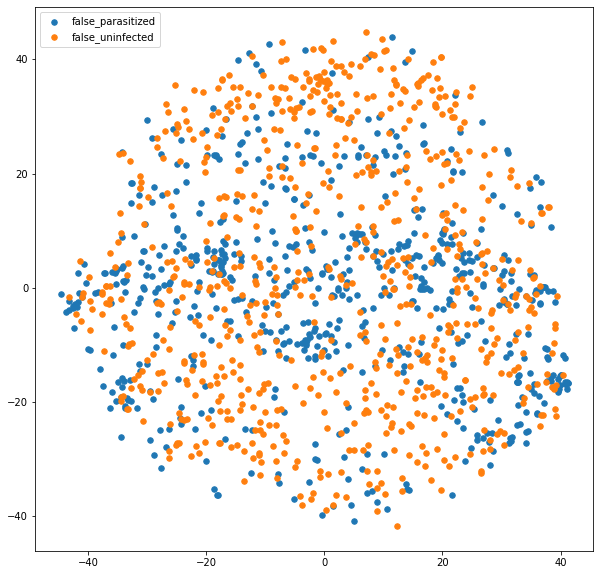

In [31]:
plt.figure(figsize = (10, 10))

for val in ['false_parasitized', 'false_uninfected']:
    plt.scatter(fit_df[fit_df.label == val].x, 
                fit_df[fit_df.label == val].y,
                s = 30,
                alpha = 1,
                label = val)

plt.legend(loc = 'upper left')

### Clustering

#### KMeans

In [32]:
cls = MiniBatchKMeans(n_clusters = 2, n_init = 10, max_iter = 500, verbose =0)
cls.fit(image_array)

MiniBatchKMeans(max_iter=500, n_clusters=2, n_init=10)

Text(0.5, 1.0, 'Natural Labels')

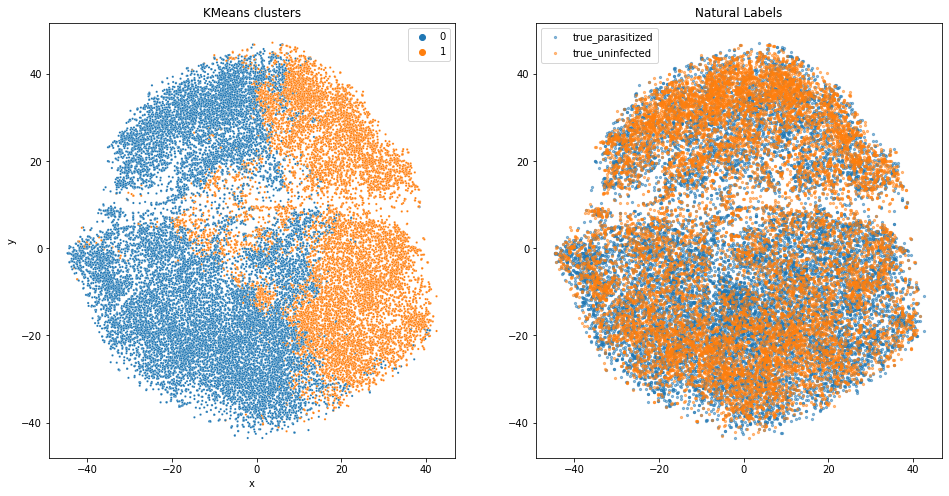

In [33]:
clusters = cls.predict(image_array)

figs, axes = plt.subplots(1, 2, figsize = (16, 8))

sns.scatterplot(x = 'x', y = 'y', hue = clusters, data = fit_df, ax = axes[0], s = 5)
axes[0].set_title("KMeans clusters")
for val in ['true_parasitized', 'true_uninfected']:
    axes[1].scatter(fit_df[fit_df.label == val].x, 
                fit_df[fit_df.label == val].y,
                s = 5,
                alpha = 0.5,
                label = val)
axes[1].legend(loc = 'upper left')
axes[1].set_title("Natural Labels")


### Plotting Image Size 

In [34]:
def get_images_size(path, IMAGE_MODE = 1):
    '''Reads and gets image's heights and widths into a numpy array
    Returns: a numpy array
    
    Arguments:
    
    1. path_arr: array containing paths to the images
    2. IMAGE_MODE: the state of the images - 1 for Colour, 0 for GrayScale, as per opencv2 documentation'''
    im = cv2.imread(path, IMAGE_MODE)
    arr = np.array(im)
    h,w,d = arr.shape
    return h,w

c:\ProgramData\Anaconda3\envs\tf2.9\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\envs\tf2.9\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\krish\AppData\Local\Temp\ipykernel_21440\2942618454.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


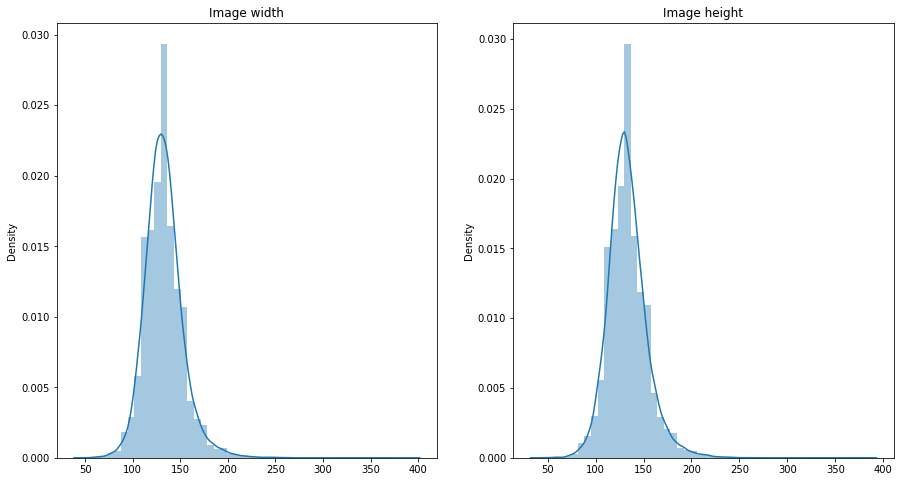

In [35]:
width_list = []
height_list = []
for path in images.ImagePath.to_numpy():
    h,w = get_images_size(path)
    width_list.append(w)
    height_list.append(h)
    
fig, ax =plt.subplots(1,2, figsize=(15, 8))
sns.distplot(width_list, ax=ax[0])
ax[0].set_title('Image width')
sns.distplot(height_list, ax=ax[1])
ax[1].set_title('Image height')
fig.show()

c:\ProgramData\Anaconda3\envs\tf2.9\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Scatterplot of Image Width vs Height')

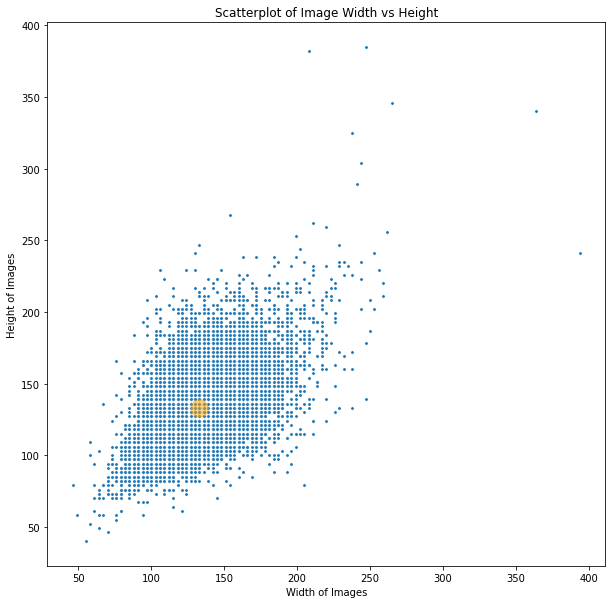

In [51]:
mean_width = np.mean(width_list)
mean_height = np.mean(height_list)

plt.figure(figsize = (10,10))

ax = sns.scatterplot(width_list, height_list, s = 10)
ax.set_xlabel("Width of Images")
ax.set_ylabel("Height of Images")

ax.scatter([mean_width], [mean_height], color = 'orange', s = 300, alpha = 0.5)

ax.set_title("Scatterplot of Image Width vs Height")

c:\ProgramData\Anaconda3\envs\tf2.9\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mean ratio (height/width) of images is:  1.0138670106815695


Text(0.5, 1.0, 'image ratio (height/width) distribution')

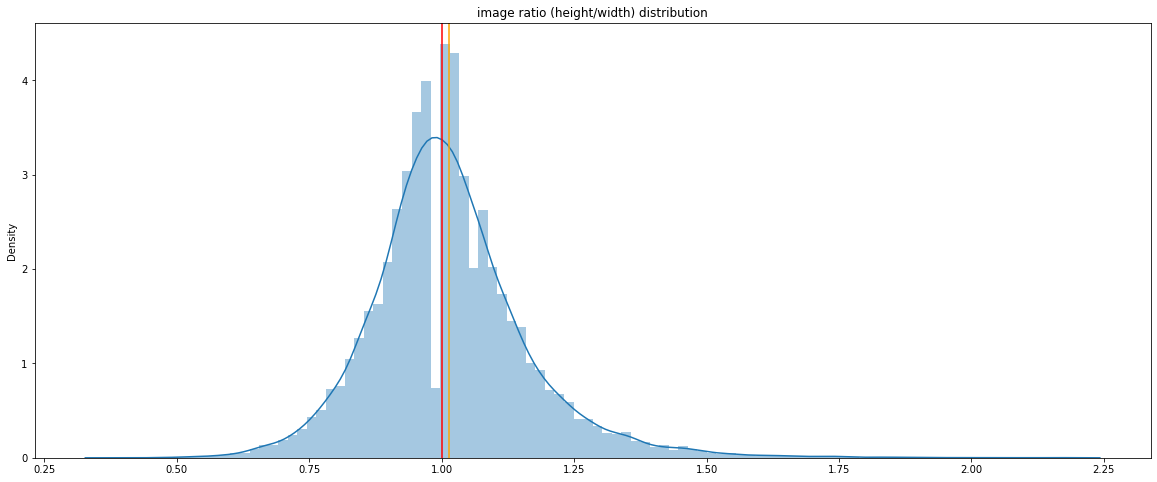

In [36]:
image_ratio_list = [int(x)/int(y) for x,y in zip(height_list, width_list)]
mean_ratio = sum(image_ratio_list)/len(image_ratio_list)
print('mean ratio (height/width) of images is: ', mean_ratio)
plt.subplots(figsize=(20, 8))
sns.distplot(image_ratio_list, bins=100)
plt.axvline(mean_ratio,color='orange', label='mean')
plt.axvline(x=1, color='red', label='x=1')
plt.title('image ratio (height/width) distribution')